<a href="https://colab.research.google.com/github/Shaalan-omar/8x8-Array-Multiplier/blob/main/trial_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [18]:
# example of loading the MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
# load and summarize the MNIST dataset
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', (test_images.shape, test_labels.shape))
# summarize pixel values
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))
Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


In [20]:
# create and configure the data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None)

In [22]:

# calculate scaling statistics on the training dataset
datagen.fit(x_train)

ValueError: ignored

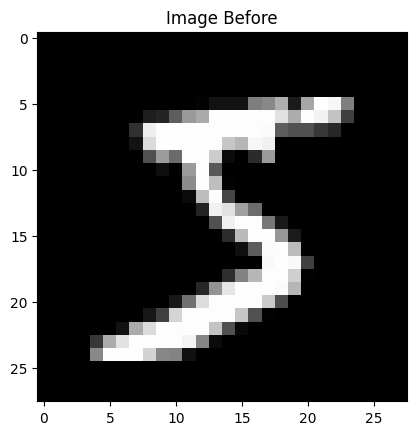

Batches train=938, test=157
Epoch 1/5


<ipython-input-6-54bc078f223d>:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)


938/938 [==============================] - 9s 7ms/step - loss: 0.1482 - accuracy: 0.9544
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0325 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0247 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0191 - accuracy: 0.9933


ValueError: ignored

In [6]:
# example of using ImageDataGenerator to standardize images
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

width, height, channels = trainX.shape[1], trainX.shape[2], 1
#plotting
plt.imshow(trainX[0].reshape((width, height)), cmap='gray')
plt.title('Image Before')
plt.show()
# reshape dataset to have a single channel

trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(trainX)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)

###############
resized_image = train_iterator[0][0]

# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

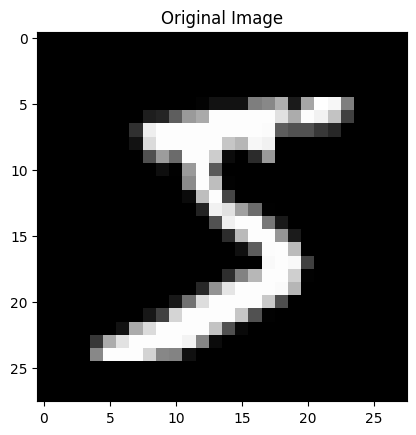

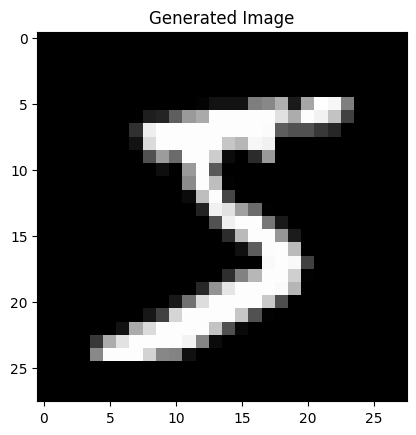

In [18]:
# plt.imshow(resized_image[5].reshape((width, height)), cmap='gray')
# plt.imshow(resized_image[1].reshape((width, height)), cmap='gray')
# plt.imshow(resized_image[2].reshape((width, height)), cmap='gray')
# plt.imshow(resized_image[3].reshape((width, height)), cmap='gray')
# plt.imshow(resized_image[4].reshape((width, height)), cmap='gray')
# plt.imshow(resized_image[].reshape((width, height)), cmap='gray')
# plt.title('Image After')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Select an image from the training set
image_index = 0
original_image = trainX[image_index]

# Print the image before applying the generator
plt.imshow(original_image.reshape((width, height)), cmap='gray')
plt.title('Original Image')
plt.show()

# Apply the generator to the image
generated_images = datagen.flow(np.expand_dims(original_image, axis=0), batch_size=1)

# Get the first generated image
generated_image = generated_images.next()[0]

# Print the image after applying the generator
plt.imshow(generated_image.reshape((width, height)), cmap='gray')
plt.title('Generated Image')
plt.show()